# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a1d137ce921cd24566727b1b263093ff&units=imperial&q='

In [7]:
# Create lists to hold data

city_list=[]
lat_list = []
lng_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
wind_list = []
country_list = []
date_list =[]


# Set counters to keep track of cities queried
record_count = 0
set_count = 1

# Loop through the list of cities, perform a request for data
# and print the log of processed cities

print('Beginning Data Retrieval')   
print('-----------------------------------------------')

for city in cities:
    response = requests.get(query_url + city).json()
    
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0  
    try:    
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
    except:
        print("*** City not found ***")
        pass
    
    print(f"Processing Record {record_count} of Set {set_count}: {city}")

print('-----------------------------------------------')
print('Data Retrieval Complete')      
print('-----------------------------------------------')

Beginning Data Retrieval
-----------------------------------------------
Processing Record 1 of Set 1: lompoc
Processing Record 2 of Set 1: ibra
Processing Record 3 of Set 1: bredasdorp
Processing Record 4 of Set 1: faya
Processing Record 5 of Set 1: victoria
Processing Record 6 of Set 1: busselton
Processing Record 7 of Set 1: saint-philippe
Processing Record 8 of Set 1: hermanus
Processing Record 9 of Set 1: punta arenas
Processing Record 10 of Set 1: east london
Processing Record 11 of Set 1: ribeira grande
Processing Record 12 of Set 1: esperance
Processing Record 13 of Set 1: kahului
*** City not found ***
Processing Record 14 of Set 1: illoqqortoormiut
Processing Record 15 of Set 1: maraa
Processing Record 16 of Set 1: ratnagiri
Processing Record 17 of Set 1: atuona
Processing Record 18 of Set 1: kalmunai
Processing Record 19 of Set 1: shache
Processing Record 20 of Set 1: rikitea
Processing Record 21 of Set 1: new norfolk
*** City not found ***
Processing Record 22 of Set 1: mar

### Convert Raw Data to DataFrame

In [9]:
# Create & display DataFrame using the retrieved data
weather_dict ={
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_list,
    "Country": country_list,
    "Date": date_list
}
weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [10]:
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.64,-120.46,70.00,64,11,8.05,US,1594926645
1,Ibrā’,22.69,58.53,87.17,47,0,1.97,OM,1594926562
2,Bredasdorp,-34.53,20.04,48.20,93,0,3.36,ZA,1594926645
3,Faya,18.39,42.45,73.40,64,40,18.34,SA,1594926645
4,Hong Kong,22.29,114.16,84.00,79,100,8.01,HK,1594926395
5,Busselton,-33.65,115.33,53.01,87,57,10.56,AU,1594926645
6,Saint-Philippe,-21.36,55.77,66.20,77,40,5.82,RE,1594926646
7,Hermanus,-34.42,19.23,52.00,79,0,1.99,ZA,1594926646
8,Punta Arenas,-53.15,-70.92,33.80,74,75,8.05,CL,1594926646
9,East London,-33.02,27.91,58.68,40,0,5.32,ZA,1594926574


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
# Check maximum value of humidity
weather_data['Humidity'].max()

100

In [22]:
# None of the cities have humidity higher than 100% 
# No further data cleaning is needed
# weather_data is ready to be exported as csv

weather_data.to_csv(output_data_file ,index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

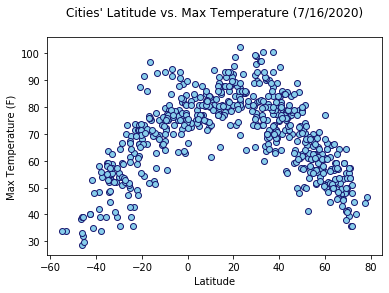

In [53]:
# Get values for plotting
latitude = weather_data['Lat']
temp = weather_data['Max Temp']

# Generate scatter plot
plt.scatter(
    latitude, temp, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
plt.title('Cities\' Latitude vs. Max Temperature (7/16/2020)\n')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/LatitudeVsTemperature.png")

In the above chart, cities' latitudes are plotted against their maximum temperatures. It is clear that temperatures of cities becomes lower when their latitudes are further away from the equator (0 degrees), whereas the coldes temperatures are noted for cities being furthest away. On the contrary, cities along the equator have the highest temperatures in the sample.

## Latitude vs. Humidity Plot

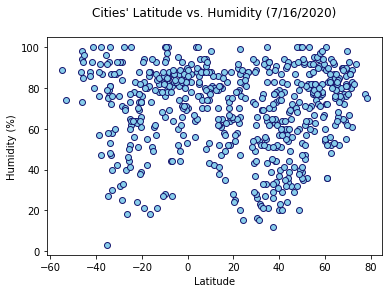

In [52]:
# Get values for plotting
humidity = weather_data['Humidity']

# Generate scatter plot
plt.scatter(
    latitude, humidity, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
plt.title('Cities\' Latitude vs. Humidity (7/16/2020)\n')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/LatitudeVsHumidity.png")

In the above chart, cities' latitude is plotted against their humidity. In general, there are more cities with higher humidity (e.g. > 40%) in our sample. That said, cities on different latitudes exhibit a wide range of humidity. On the other hand, there are also cities with 100% or close to 100% humidity that fall on various latitudes. There does not seem to be a strong relationship between latitude and humidty. There might be other factors contributing to a location's humidity such as proximity to the sea, which are not reflected in this chart.

## Latitude vs. Cloudiness Plot

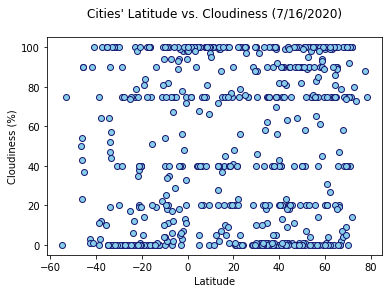

In [51]:
# Get values for plotting
cloudiness = weather_data['Cloudiness']

# Generate scatter plot
plt.scatter(
    latitude, cloudiness, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
plt.title('Cities\' Latitude vs. Cloudiness (7/16/2020)\n')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/LatitudeVsCloudiness.png")

In the above chart, cities' latitude is plotted against their cloudiness. Similar to the humidity chart, cities' levels of cloudiness are quite scattered between teh 0% to 100% range. However, there are also horizontal clusters seen at around 0%, 20%, 40%, 75% and 100%. It is not immediately clear what contributes to those clusters.

## Latitude vs. Wind Speed Plot

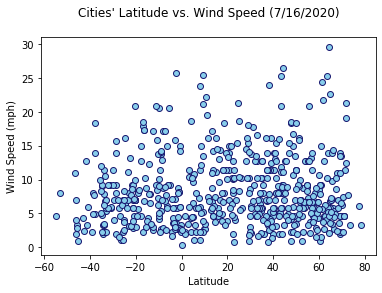

In [50]:
# Get values for plotting
wind = weather_data['Wind Speed']

# Generate scatter plot
plt.scatter(
    latitude, wind, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
plt.title('Cities\' Latitude vs. Wind Speed (7/16/2020)\n')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/LatitudeVsWindSpeed.png")

In the above chart, cities' latitude is plotted against their wind speed. In general, there are more cities with lower wind speeds (e.g. < 15 mph). Cities on different latitudes exhibit a wide range of wind speeds. For example, cities around the latitude of 60 degrees have wind speeds between close to 0 mph to as high as approximately 30 mph.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression